<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/histograms_HSV_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histograms and HSV spectrum

With histograms, we can measure how many pixels meets certain value in the image, and identify features and global values of pixels on images, with x axis for the pixel value, and y axis for the quantity of pixels.

If you don't have the needed libraries installed, run the next block.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import the libraries, and download the github images.

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

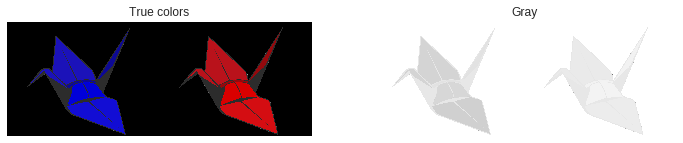

In [22]:
from PIL import Image
import requests
from io import BytesIO

# import first image
response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
bird = cv2.imread('origami.png')
bird2 = cv2.imread('origami.png')
# Convert second image to RGB spectrum
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# concatenate both
image = np.concatenate((bird, bird2), axis=1)
# Convert the result to gray spectrum
image_gray = cv2.cvtColor(birds, cv2.COLOR_BGR2GRAY)

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(birds)
axes[0].set_title('True colors')
axes[1].imshow(image_gray)
axes[1].set_title('Gray')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

Matplotlib has is own hist() function. Remember that x limit is the limit pixel value, 256.

Text(0.5,1,'BGR hist')

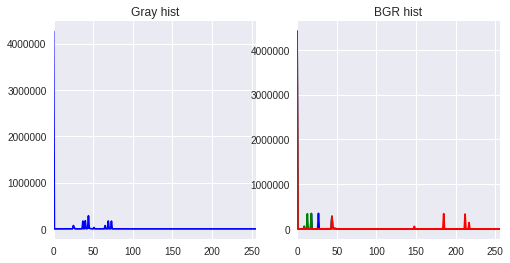

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# image, channel. mask, BINcount, range
histr = cv2.calcHist([image_gray], [0], None, [256], [0,256])
axes[0].plot(histr, color = 'b')
axes[0].set_title('Gray hist')
axes[0].axis(xmin=0, xmax=256)

color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    axes[1].plot(histr, color = col)
axes[1].axis(xmin=0, xmax=256)
axes[1].set_title('BGR hist')

## Histogram equalization

In [0]:
eyes = cv2.imread('eyes_image.png', 0)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
# Original hist
histr = cv2.calcHist([eyes], [0], None, [256], [0,256])
axes[0][0].plot(histr,color = 'b')
axes[0][0].set_title('Original hist')
axes[0][0].axis(xmin=0, xmax=256)
# Original hist
equal_histr = cv2.equalizeHist(eyes)
axes[0][1].plot(equal_histr, color = 'b')
axes[0][1].set_title('Equalize hist')
axes[0][1].axis(xmin=0, xmax=256)

axes[1][0].imshow(eyes, cmap='gray')
axes[1][0].set_title('equal_histr')
plt.axis("off");

axes[1][1].imshow(equal_histr, cmap='gray')
axes[1][1].set_title('equal_histr')
plt.axis("off");

## HSV

Select ROIs on the image is sometimes easier with HSV, like with colors, for example.


In [0]:
# Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# We can obtain the HSV value picking one BGR color and using hsv transformation
"""lower_green = np.uint8([[[0, 0,0 ]]])
upper_green = np.uint8([[[250,100,100 ]]])
lower_green = cv2.cvtColor(lower_green,cv2.COLOR_BGR2HSV)
upper_green = cv2.cvtColor(upper_green,cv2.COLOR_BGR2HSV)"""
lower_green = np.array([50, 168 , 0])
upper_green = np.array([179, 255 , 110])

maskHSV = cv2.inRange(image, lower_green, upper_green)
color_filtred = cv2.bitwise_and(image, image, mask = maskHSV)

#TODO. Represent a image with HSV dinamic values in the image
# https://stackoverflow.com/questions/47082466/matplotlib-imshow-formatting-from-cursor-position?newreg=173d0e4afe044aed95707758164cabe2

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([hsv],[i], None, [256], [0,256])
    axes[0].plot(histr,color = col)
axes[0].legend(["hue", "sat", "val"])
axes[0].axis(xmin=0,xmax=256)
axes[0].axis(ymin=0,ymax=2000)
axes[0].set_title('HSV hist')

axes[1].imshow(color_filtred)
axes[1].set_title('HSV filtred')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])